## Informasi Mahasiswa

Nama: Marlina

NPM : 2108107010009

## Jenis Dataset
Dataset dari kaggle https://www.kaggle.com/datasets/mohannapd/mobile-price-prediction/data

### Deskripsi Dataset:
Dataset ini merupakan kumpulan data yang menampilkan berbagai faktor yang mempengaruhi harga ponsel, seperti resolusi, merek, ukuran, berat, kualitas gambar, RAM, baterai, dan kekuatan CPU. Tujuan dari dataset ini adalah untuk memperkirakan harga ponsel berdasarkan fitur-fitur yang disebutkan di atas.

### Informasi Atribut:
- **Product_id**: Merupakan identifikasi unik untuk setiap produk.
- **Price**: Merupakan harga produk dalam satuan tertentu (mungkin dalam mata uang tertentu).
- **Sale**: Mungkin merupakan penjualan atau jumlah penjualan produk tersebut.
- **weight**: Merupakan berat produk, umumnya dalam satuan tertentu (misalnya gram).
- **resolution**: Merupakan resolusi layar produk.
- **ppi**: Pixels Per Inch (PPI) merupakan ukuran kepadatan piksel layar, yang dapat mempengaruhi kualitas tampilan.
- **cpu core**: Jumlah inti (core) pada prosesor.
- **cpu freq**: Frekuensi prosesor dalam satuan tertentu (mungkin GHz).
- **internal mem**: Merupakan ukuran memori internal produk dalam satuan tertentu (misalnya GB).
- **ram**: Merupakan ukuran memori RAM produk dalam satuan tertentu (misalnya GB).
- **RearCam**: Resolusi kamera belakang produk.
- **Front_Cam**: Resolusi kamera depan produk.
- **battery**: Kapasitas baterai produk dalam satuan tertentu (misalnya mAh).
- **thickness**: Ketebalan produk dalam satuan tertentu (misalnya cm).

### Studi Kasus regresi

Studi kasus dataset ini adalah membangun model SVR untuk memprediksi harga produk berdasarkan fitur-fiturnya. Misalnya, kita ingin memprediksi harga produk berdasarkan resolusi layar, kepadatan piksel (PPI), jumlah inti prosesor, ukuran memori internal, dan lain-lain.

## Import Libary dan Baca dataset

In [24]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from keras import callbacks

# Membaca dataset

In [25]:
# Baca dataset
df = pd.read_csv("dataset/Cellphone.csv")
df.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


# Preprocessing Data

In [26]:
# informasi umum kolom pada dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [27]:
# cek apakah ada missing value pada dataset
df.isnull().sum()

Product_id      0
Price           0
Sale            0
weight          0
resoloution     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64

In [28]:
#drop duplicate data
df.drop_duplicates(inplace=True)

#check duplicate data
df.duplicated().sum()

0

In [29]:
df.drop('Product_id', inplace = True, axis = 1)

In [30]:
# informasi statistik dari dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,161.0,2215.596273,768.187171,614.0,1734.0,2258.00,2744.000,4361.0
Sale,161.0,621.465839,1546.618517,10.0,37.0,106.00,382.000,9807.0
weight,161.0,170.426087,92.888612,66.0,134.1,153.00,170.000,753.0
resoloution,161.0,5.209938,1.509953,1.4,4.8,5.15,5.500,12.2
ppi,161.0,335.055901,134.826659,121.0,233.0,294.00,428.000,806.0
cpu core,161.0,4.857143,2.444016,0.0,4.0,4.00,8.000,8.0
cpu freq,161.0,1.502832,0.599783,0.0,1.2,1.40,1.875,2.7
internal mem,161.0,24.501714,28.804773,0.0,8.0,16.00,32.000,128.0
ram,161.0,2.204994,1.609831,0.0,1.0,2.00,3.000,6.0
RearCam,161.0,10.378261,6.181585,0.0,5.0,12.00,16.000,23.0


In [31]:
# dataset setelah di drop kolom No dan Transaction_Date
df.head(5)

,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


# Exploratory Data Analysis

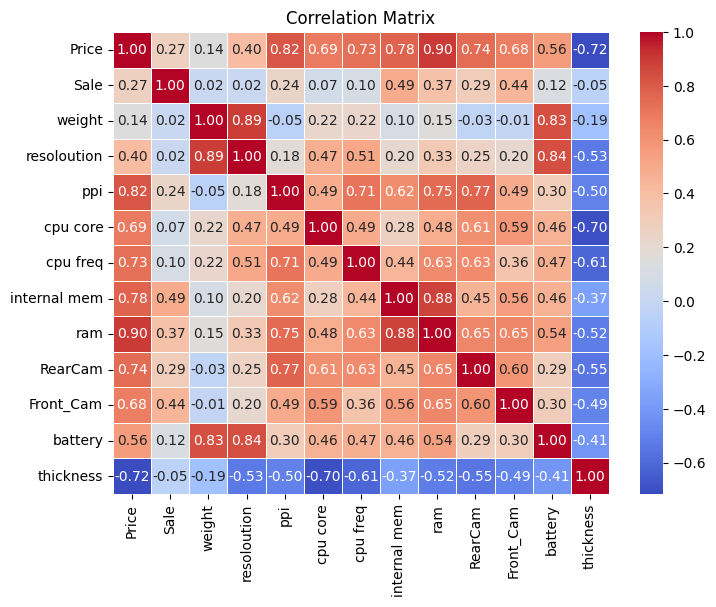

In [32]:
#check korelasi

# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Split dataset dan Normalisasi Data

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Initialise the Scaler 
scaler = StandardScaler() 

# Tentukan variabel independen dan dependen
X = df[['ppi']]  # Notice the double brackets to keep it as a DataFrame
y = df['Price']

# Scaling the data independent variable
X_scaled = scaler.fit_transform(X)  # Ensure X remains a 2D array after scaling
y_scaled = scaler.fit_transform(y.values.reshape(-1,1)).flatten()

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)


## Membangun Model


In [34]:
model = keras.Sequential([
    layers.Input(shape=(1,)),        # Input layer
    layers.Dense(32, activation='relu'),  # Hidden layer with 32 neurons and ReLU activation
    layers.Dense(1)                  # Output layer with a single neuron (for regression)
])

model.compile(optimizer='adam', loss='mean_squared_error')



In [35]:
# You can adjust the number of epochs and batch size based on your data and resources.
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.9436 - val_loss: 0.8807
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.8603 - val_loss: 0.8310
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.7967 - val_loss: 0.7847
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.7506 - val_loss: 0.7422
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.7544 - val_loss: 0.7044
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6514 - val_loss: 0.6700
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5338 - val_loss: 0.6389
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5397 - val_loss: 0.6106
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5928 - val_loss: 0.5847
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5573 - val_loss: 0.5618
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.4192 - val_loss: 0.5419
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4690 - val_los

In [36]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 32)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 293 (1.15 KB)

 Trainable params: 97 (388.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 196 (788.00 B)

In [37]:
# Convert continuous values to binary using a threshold (e.g., 0.5)
threshold = 0.5
y_test_binary = (y_test > threshold).astype(int)


In [38]:
#Early stopping
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)
# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 150, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/150


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2248 - val_loss: 0.2494
Epoch 2/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2363 - val_loss: 0.2498
Epoch 3/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2195 - val_loss: 0.2501
Epoch 4/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2296 - val_loss: 0.2494
Epoch 5/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2432 - val_loss: 0.2501
Epoch 6/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2278 - val_loss: 0.2510
Epoch 7/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2451 - val_loss: 0.2513
Epoch 8/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2343 - val_loss: 0.2517
Epoch 9/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2229 - val_loss: 0.2516
Epoch 10/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2496 - val_loss: 0.2518
Epoch 11/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2515 - val_loss: 0.2512
Epoch 12/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2339 - val_loss: 0.2515
E

Text(0.5, 1.0, 'Loss vs Val_Loss')

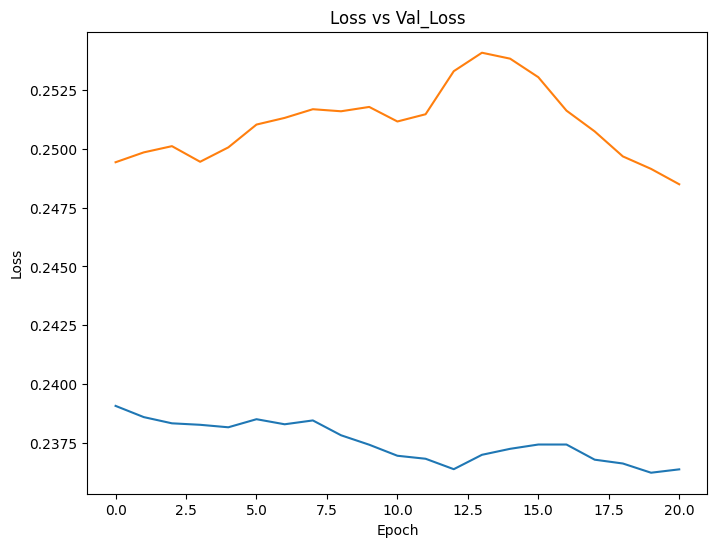

In [39]:
# plot loss dan val_loss
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='Loss') # loss is the loss on the training set
plt.plot(history.history['val_loss'], label='Val_Loss') # val loss is the loss on the validation set
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Val_Loss')

In [40]:
from sklearn.metrics import accuracy_score

# Assuming y_pred contains the model's predictions
y_pred = model.predict(X_test)

# Convert predictions to labels (binary)
y_pred_labels = (y_pred > threshold).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test_binary, y_pred_labels)

print(f"Test Accuracy: {accuracy:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Test Accuracy: 0.7273


In [41]:
# Evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 0.4046  
Test Loss: 0.4005


Loss output dari data predict adalah 0.40

In [42]:
# Make predictions
predictions = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [43]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.49955727708374886


In [44]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
print("R-squared (R2) Score:", r2)

R-squared (R2) Score: 0.5856576086801948
